# **Problem Statement:**


Linear regression by using Deep Neural network: Implement Boston housing price
predictionproblem by Linear regression using Deep Neural network. Use Boston House price
prediction dataset. 

About the dataset:

Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

Objective:

Understand the Dataset & cleanup (if required).

Build Regression models to predict the sales w.r.t a single & multiple feature.

Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Model


Setting Values

In [2]:
test_size = 0.2
learning_rate = 0.01
epochs = 150
batch = 10

# **Loading dataset**

In [4]:
df = pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# **EDA:**

Data Preprocessing

In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.any()

Unnamed: 0    True
crim          True
zn            True
indus         True
chas          True
nox           True
rm            True
age           True
dis           True
rad           True
tax           True
ptratio       True
black         True
lstat         True
medv          True
dtype: bool

<Axes: >

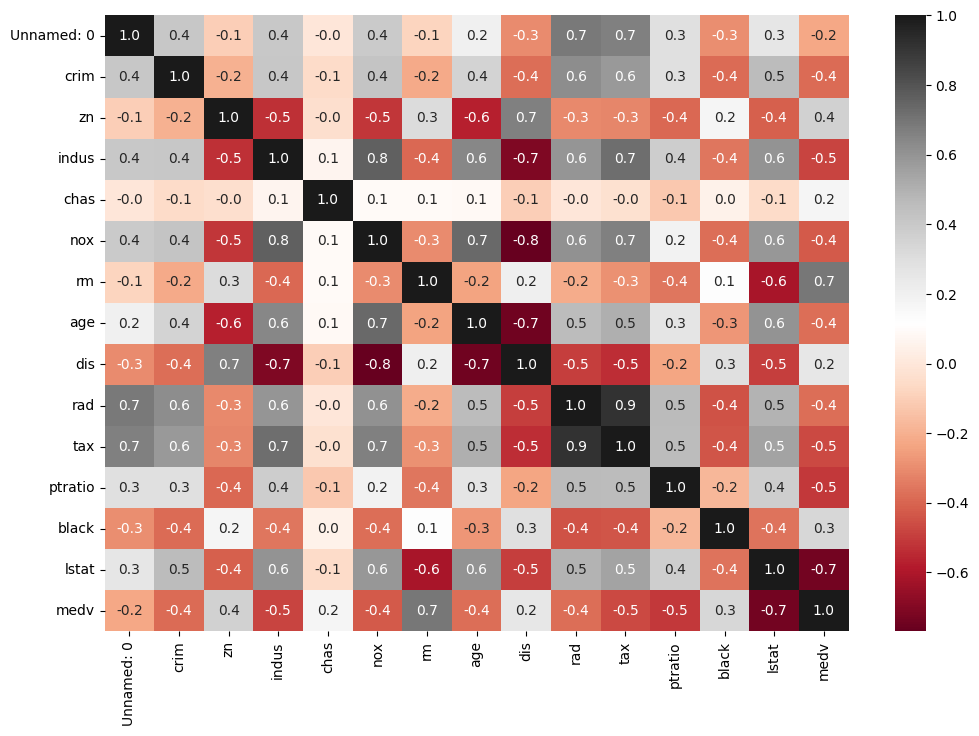

In [8]:
df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'RdGy', annot = True, fmt = '.1f')

In [9]:
df.isna().sum()


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

# **Feature Engineering:**

Seperating dependent (y) and independent (x) variables

In [10]:
X = df.drop('medv', axis = 1)
Y = df.medv
print(X.shape,Y.shape)

(506, 14) (506,)


# **Model Building/ training and testing:**

Splitting training and testing dataset

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.20, random_state=1)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print('Y_test', Y_test.shape)

X_train (404, 14)
Y_train (404,)
X_test (102, 14)
Y_test (102,)


Creating and training model

In [12]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(
optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
loss=tf.keras.losses.MeanSquaredError(),
metrics=tf.keras.metrics.MeanSquaredError()
)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, verbose=True)

Epoch 1/150
41/41 [==============================] - 1s 1ms/step - loss: 826.0920 - mean_squared_error: 826.0920 
Epoch 2/150
41/41 [==============================] - 0s 1ms/step - loss: 282.0378 - mean_squared_error: 282.0378
Epoch 3/150
41/41 [==============================] - 0s 1ms/step - loss: 154.7862 - mean_squared_error: 154.7862
Epoch 4/150
41/41 [==============================] - 0s 1ms/step - loss: 109.5290 - mean_squared_error: 109.5290
Epoch 5/150
41/41 [==============================] - 0s 1ms/step - loss: 96.8062 - mean_squared_error: 96.8062
Epoch 6/150
41/41 [==============================] - 0s 1ms/step - loss: 75.9347 - mean_squared_error: 75.9347
Epoch 7/150
41/41 [==============================] - 0s 1ms/step - loss: 66.8832 - mean_squared_error: 66.8832
Epoch 8/150
41/41 [==============================] - 0s 1ms/step - loss: 59.0459 - mean_squared_error: 59.0459
Epoch 9/150
41/41 [==============================] - 0s 1ms/step - loss: 56.6503 - mean_squared_error: 

# **Evaluating model**

4/4 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Test vs Prediction')

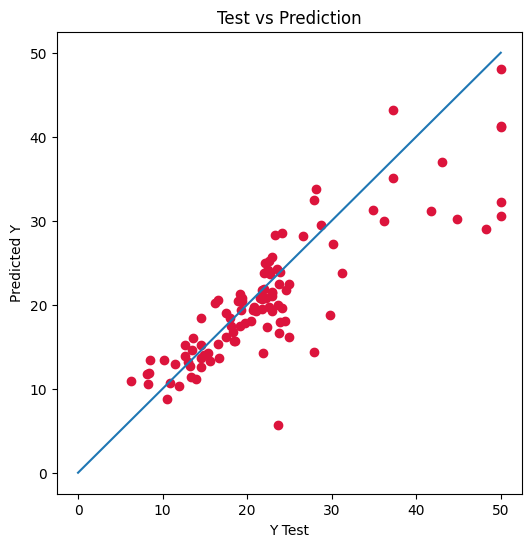

In [13]:
pred = model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, pred, c='crimson')
plt.plot(range(int(max(max(Y_test), max(pred)[0]))+1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

In [14]:
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)
mse = mean_squared_error(Y_predict,Y_test)
mse

4/4 [==============================] - 0s 3ms/step


30.604872509614236

In [15]:
print('The MSE value is: ', model.evaluate(X_test, Y_test, verbose=False)[0])

The MSE value is:  30.604873657226562
